## Your Name: Yashi Sarbhai
## Your NetID: yas19006
## Due: Friday, April 3, 2020, 11:59pm

In [70]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Scrape tweets and save as txt files

In [71]:
pip install getoldtweets3

In [0]:
import GetOldTweets3 as got
def scrape_tweets(username):
  username = username
  count = 2000
  # Creation of query object
  tweetCriteria = got.manager.TweetCriteria().setUsername(username)\
                                          .setMaxTweets(count)
  # Creation of list that contains all tweets
  tweets = got.manager.TweetManager.getTweets(tweetCriteria)
  # Creating list of chosen tweet data
  user_tweets = [[tweet.text] for tweet in tweets]
  return user_tweets

In [0]:
# Using scrape_tweets() function to return tweets of Trump and Obama.

# Tweets From Barack Obama
obama = scrape_tweets("barackobama")
# Tweets from Trump
trump = scrape_tweets("realDonaldTrump")

In [0]:
# Save all tweets to two folders
for i in range(0,len(trump)):
  path='/content/drive/My Drive/Colab Notebooks/DeepLearning/Week4-Recurrent Neural Network (Time Series)/Trump/trump'+str(i)+'.txt'
  with open(path, "w") as output:
    output.write(str(trump[i]))
for i in range(0,len(obama)):
  path='/content/drive/My Drive/Colab Notebooks/DeepLearning/Week4-Recurrent Neural Network (Time Series)/Obama/obama'+str(i)+'.txt'
  with open(path, "w") as output:
    output.write(str(obama[i]))

# Loading data and prepare data for modeling

In [75]:
#Load the data you just saved from your drive

import os

tweet_dir = '/content/drive/My Drive/Colab Notebooks/DeepLearning/Week4-Recurrent Neural Network (Time Series)'

labels = []
texts = []
count = 0
for label_type in ['Obama/', 'Trump/']:
    dir_name = os.path.join(tweet_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            count = count + 1
            print(count)
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'Obama/':
                labels.append(0)
            else:
                labels.append(1)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


## Tokenizing Data

In [0]:
# Tokenize, pad and prepare training and validation data

# Tokenizing
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

maxlen = 100 
training_samples = 3200  
validation_samples = 800  
Max_Words = 10000  


## Padding

In [80]:
tokenizer = Tokenizer(num_words=Max_Words)

# fit_on_texts Updates internal vocabulary based on a list of texts. 
#This method creates the vocabulary index based on word frequency. 
tokenizer.fit_on_texts(texts)

# the sequences are comprised of those indices
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

# in case of low word counts, we need to pad sequences
# so that they are uniform length
data = pad_sequences(sequences, maxlen= maxlen)

# our labels, which were previously stored as a list [],
# are now converted to a numpy array for modeling
labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

Found 10172 unique tokens.
Shape of data tensor: (4000, 100)
Shape of label tensor: (4000,)


## Splitting into Validation and Training

In [0]:
indices = np.arange(data.shape[0])
np.random.shuffle(indices) #Shuffl the data first
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples] 
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

# Modeling: Fit three models with different architecture

## Model 1

In [82]:
# Start fitting models
# For example, LSTM, Bidirectional, 1D conv.
# Show plots of the results for each model

import tensorflow as tf

model1 = tf.keras.Sequential()
model1.add(tf.keras.layers.Embedding(Max_Words, 16))
model1.add(tf.keras.layers.LSTM(16,return_sequences=True))
model1.add(tf.keras.layers.LSTM(8, return_sequences=True))
model1.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model1.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
model1.summary()

history = model1.fit(x_train, y_train,
                    epochs=50,
                    batch_size=32,
                    validation_split=0.2)

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, None, 16)          160000    
_________________________________________________________________
lstm_5 (LSTM)                (None, None, 16)          2112      
_________________________________________________________________
lstm_6 (LSTM)                (None, None, 8)           800       
_________________________________________________________________
dense_8 (Dense)              (None, None, 1)           9         
Total params: 162,921
Trainable params: 162,921
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
80/80 [==============================] - 5s 58ms/step - loss: 0.6844 - acc: 0.5447 - val_loss: 0.6652 - val_acc: 0.5552
Epoch 2/50
80/80 [==============================] - 4s 48ms/step - loss: 0.6497 - acc: 0.5773 - val_loss: 0.6342 - 

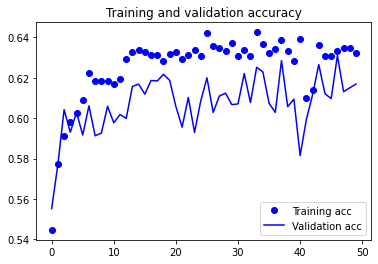

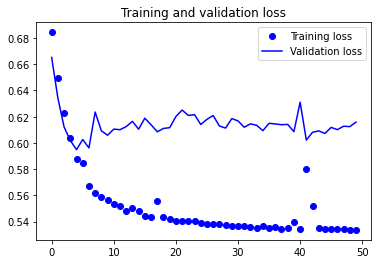

In [83]:
#Plotting model1 results
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [86]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

y_pred1 = model1.predict(x_val)
y_predict1 = []
for i in y_pred1:
  if i >= 0.5:
    y_predict1.append(1)
  else:
    y_predict1.append(0)

target_names = ['Obama', 'Trump']
print(classification_report(y_val, y_predict1, target_names = target_names))
print(confusion_matrix(y_val,y_predict1))

ValueError: ignored

## Model 2

In [0]:
import tensorflow as tf

model2 = tf.keras.Sequential()
model2.add(tf.keras.layers.Embedding(Max_Words, 32))
model2.add(tf.keras.layers.Dropout(0.2))
model2.add(tf.keras.layers.GRU(16,return_sequences=True))
model3.add(tf.keras.layers.Dropout(0.2))
model2.add(tf.keras.layers.GRU(8, return_sequences=True))
model3.add(tf.keras.layers.Dropout(0.2))
model2.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model2.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
model2.summary()

history2 = model2.fit(x_train, y_train,
                    epochs=50,
                    batch_size=32,
                    validation_split=0.2)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
dropout_7 (Dropout)          (None, None, 32)          0         
_________________________________________________________________
gru_7 (GRU)                  (None, None, 16)          2400      
_________________________________________________________________
gru_8 (GRU)                  (None, None, 8)           624       
_________________________________________________________________
dense_7 (Dense)              (None, None, 1)           9         
Total params: 323,033
Trainable params: 323,033
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
75/75 [==============================] - 5s 66ms/step - loss: 0.6846 - acc: 0.5441 - val_loss: 0.6673 -

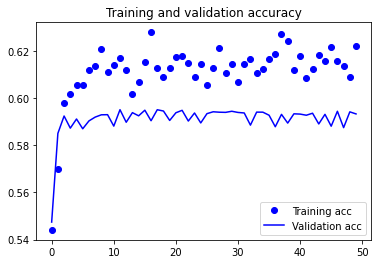

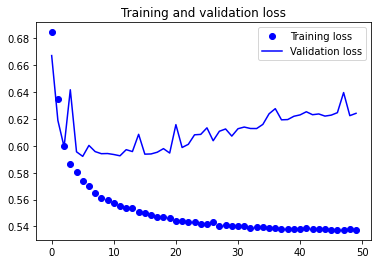

In [0]:
#Plotting model2 results
import matplotlib.pyplot as plt
acc = history2.history['acc']
val_acc = history2.history['val_acc']
loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [0]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

y_pred2 = model2.predict(x_val)
y_predict2 = []
for i in y_pred2:
  if i >= 0.5:
    y_predict2.append(1)
  else:
    y_predict2.append(0)

target_names = ['Obama', 'Trump']
print(classification_report(y_val, y_predict2, target_names = target_names))

print("confusion Matrix for Model2")


print(confusion_matrix(y_val,y_predict2))

ERROR! Session/line number was not unique in database. History logging moved to new session 62


ValueError: ignored

## Model 3

In [85]:
import tensorflow as tf

model3 = tf.keras.Sequential()
model3.add(tf.keras.layers.Embedding(Max_Words,32))
model3.add(tf.keras.layers.Dropout(0.2))
model3.add(tf.keras.layers.LSTM(32, return_sequences=True))
model3.add(tf.keras.layers.Dropout(0.2))
model3.add(tf.keras.layers.GRU(16, return_sequences=True))
model3.add(tf.keras.layers.Dropout(0.2))
model3.add(tf.keras.layers.LSTM(8))
model3.add(tf.keras.layers.Dropout(0.2))
model3.add(tf.keras.layers.Dense(16, activation='sigmoid'))
model3.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model3.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
model3.summary()

es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min',
                   patience=5, verbose=1)

history3 = model3.fit(x_train, y_train,
                    epochs=50,
                    batch_size=32,
                    validation_split=0.2, callbacks = [es])

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
dropout_10 (Dropout)         (None, None, 32)          0         
_________________________________________________________________
lstm_7 (LSTM)                (None, None, 32)          8320      
_________________________________________________________________
dropout_11 (Dropout)         (None, None, 32)          0         
_________________________________________________________________
gru_9 (GRU)                  (None, None, 16)          2400      
_________________________________________________________________
dropout_12 (Dropout)         (None, None, 16)          0         
_________________________________________________________________
lstm_8 (LSTM)                (None, 8)                

ERROR! Session/line number was not unique in database. History logging moved to new session 61


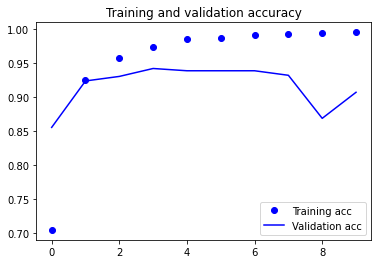

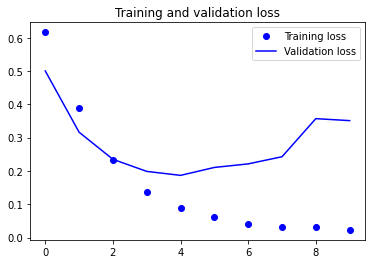

In [0]:
#Plotting model3 results
import matplotlib.pyplot as plt

acc = history3.history['acc']
val_acc = history3.history['val_acc']
loss = history3.history['loss']
val_loss = history3.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [0]:
from sklearn.metrics import classification_report

y_pred3 = model3.predict(x_val)
y_predict3 = []
for i in y_pred3:
  if i >= 0.5:
    y_predict3.append(1)
  else:
    y_predict3.append(0)

target_names = ['Obama', 'Trump']
print(classification_report(y_val, y_predict3, target_names = target_names))

print("confusion Matrix for Model3")
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_val,y_predict3))

              precision    recall  f1-score   support

       Obama       0.89      0.98      0.93       521
       Trump       0.97      0.86      0.91       479

    accuracy                           0.92      1000
   macro avg       0.93      0.92      0.92      1000
weighted avg       0.93      0.92      0.92      1000

confusion Matrix for Model3
[[508  13]
 [ 65 414]]


# Analysis: Compare the results and talk about how you improve the results

# Model 1
The arcitceture of model consists of Embedded Layer with 16 Dimension (The Embedding layer is a dictionary that maps integer indices)It also consits of two LSTM Layers with 16 and 8 Hidden Units respectively. The dropout rate of 0.2 is also introduced. The accuracy of the model is 64%

# Model 2
The arcitceture of model consists of Embedded Layer with 32 Dimension (The Embedding layer is a dictionary that maps integer indices)It also consits of two GRU Layers with 16 and 8 Hidden Units respectively. The dropout rate of 0.2 is also introduced. The accuracy of the model is approx 62%

# Model 3
The arcitceture of model consists of Embedded Layer with 32 Dimension (The Embedding layer is a dictionary that maps integer indices)It also consits of LSTM layer of 32 hidden Units. Stacking  GRU Layers with 16 and again a LSTM Layer with 8 Hidden Units respectively. The dropout rate of 0.2 is also introduced. I have also Introduced Early stopping with Patience =5 and The accuracy of the model is approx 99.8%

#Conclusion:
The validation and Training are  divided into 20% and 80% respectively with maximum word length as 100 words.
Model 3 comes out to be the best model with Accuracy 99.8% approximatel.
